# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import sys
import scanpy as sc
import anndata as ann
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import logging
import os
from plotnine import *
import plotnine
import scipy.io
import seaborn as sns

sc.settings.verbosity = 3
sc.logging.print_version_and_date()

sc.logging.print_version_and_date()
sc.logging.print_header()

Running Scanpy 1.7.2, on 2021-08-09 15:10.
Running Scanpy 1.7.2, on 2021-08-09 15:10.
scanpy==1.7.2 anndata==0.7.5 umap==0.4.6 numpy==1.21.0 scipy==1.5.2 pandas==1.2.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 louvain==0.7.0 leidenalg==0.8.3


In [2]:
# setting the plots size scanpy

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100)
fig=plt.figure(figsize = (5, 7))
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.5 umap==0.4.6 numpy==1.21.0 scipy==1.5.2 pandas==1.2.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 louvain==0.7.0 leidenalg==0.8.3


<Figure size 500x700 with 0 Axes>

In [3]:
adata = sc.read_h5ad('/mnt/ibm_lg/shoshana/trachasp/adata_scVI_samplesremoved_epoch100.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 12197 × 33534
    obs: 'Identity', 'Patient', 'batch', 'VAP', 'Time', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'percent_mito', 'percent_ribo', 'percent_SARS', 'n_genes', 'n_counts', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var'
    var: 'feature_types', 'gene_ids-0-0', 'gene_ids-1-0', 'gene_ids-2-0', 'gene_ids-3-0', 'gene_ids-4-0', 'gene_ids-5-0', 'gene_ids-6-0', 'gene_ids-7-0', 'gene_ids-8-0', 'gene_ids-9-0', 'gene_ids-1', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Identity_colors', 'Patient_colors', 'Time_colors', 'VAP_colors', '_scvi', '_training_mode', 'neighbors', 'umap'
    obsm: 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'raw_counts'
    obsp

# Look at Object

In [5]:
#adata.obsm['X_umap'] = adata.obsm['X_scvi_umap'] - leiden/louvain not embedded so did use_rep="X-scvi"

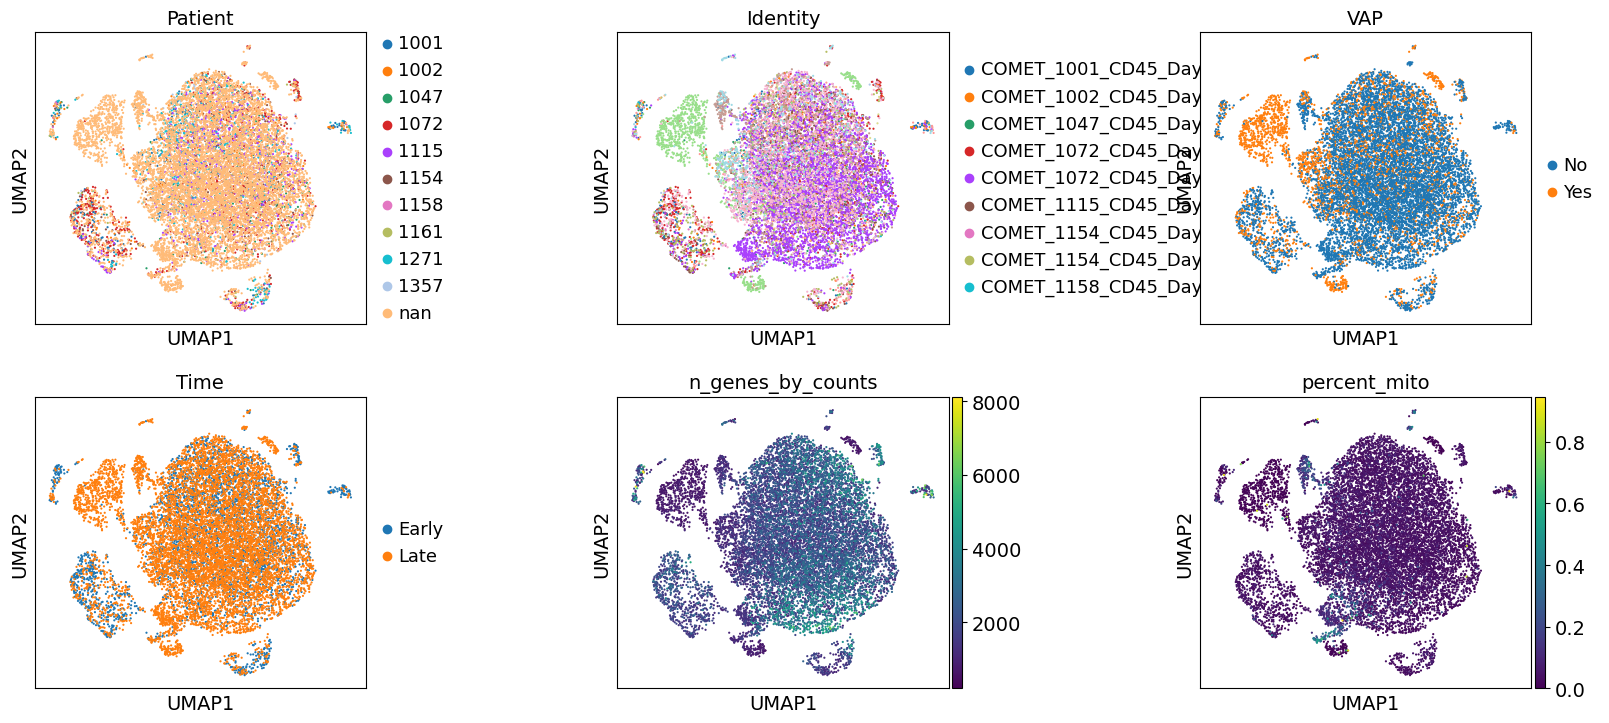

In [6]:
sc.pl.umap(adata, color=['Patient', 'Identity', 'VAP', 'Time', 'n_genes_by_counts', 'percent_mito'], ncols=3, wspace=0.6)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 4 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP


UMAP


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


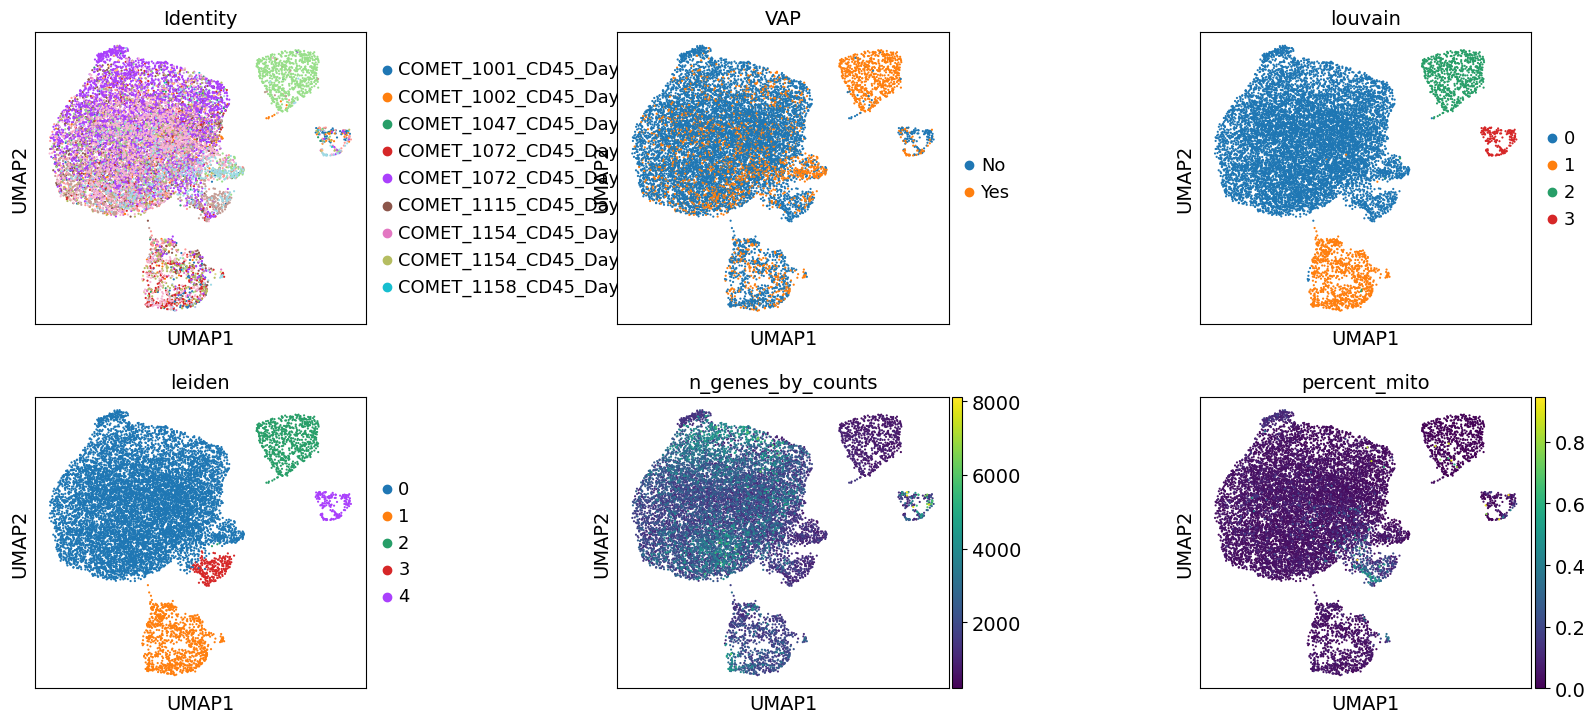

In [7]:
# umap and clustering
### louvain and ledien clustering
sc.pp.neighbors(adata, use_rep="X_scvi")
sc.tl.louvain(adata, resolution = .08)
sc.tl.leiden(adata, resolution = .08)

### UMAP
print('UMAP')
sc.tl.umap(adata)
sc.pl.umap(adata, color=['Identity', 'VAP', 'louvain','leiden', 'n_genes_by_counts', 'percent_mito'], ncols=3, wspace=0.6)

In [8]:
marker_genes_dict = {'B-cell': ['CD79A', 'MS4A1','MS4A1','CD24','CD19'],
                     'T-cell': ['CD3D','CD3E','LCK',"IL32",'CD2','PTPRCAP'],
                     'T-CD8+': ['CD8A', 'CD8B'],
                     'T-CD4+': ['CD4','GATA3','FOXP3','IL17A','IFNG'],
                     'NK': ['GNLY', 'NKG7','KLRD1'],
                     'Mono/Macro': ['FCGR3A','CD14','CD68','MARCO','C1QA','APOE','APOC1','FCN1','CD163'],
                     'Alveolar Mac':['PPARG','FABP4','SERPING1','MRC1','LAMP2'],
                     'Monocyte':['CD14','S100A8','S100A9','SELL','IRF7','LY6E'],
                     'Neutrophil':['FCGR3B','CXCR2','PROK2','S100A8','SRGN','NAMPT'],
                     'Dendritic': ['LAMP3','CD1E','HLA-DOA','HLA-DOB','IRF8','SIRPA'],
                     'Epithelial':['KRT18','EPCAM','KRT17'],
                     'Basal':['KRT5','TP63','TP63','DAPL1'],                   
                     'Secretory':['SPDEF','CREB3L1','MUC5B','MUC5AC'],
                     'Ciliated':['FOXJ1','SNTN','CDHR3','TPPP3','TUBB1','TP73','CCDC78'],  
                     'AT1':['AGER','PDPN','CLIC5'],
                     'AT2':['SFTPB','SFTPC','SFTPD','MUC1','ETV5'],}

         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:23)
Storing dendrogram info using `.uns['dendrogram_louvain']`
categories: 0, 1, 2, etc.
var_group_labels: B-cell, T-cell, T-CD8+, etc.


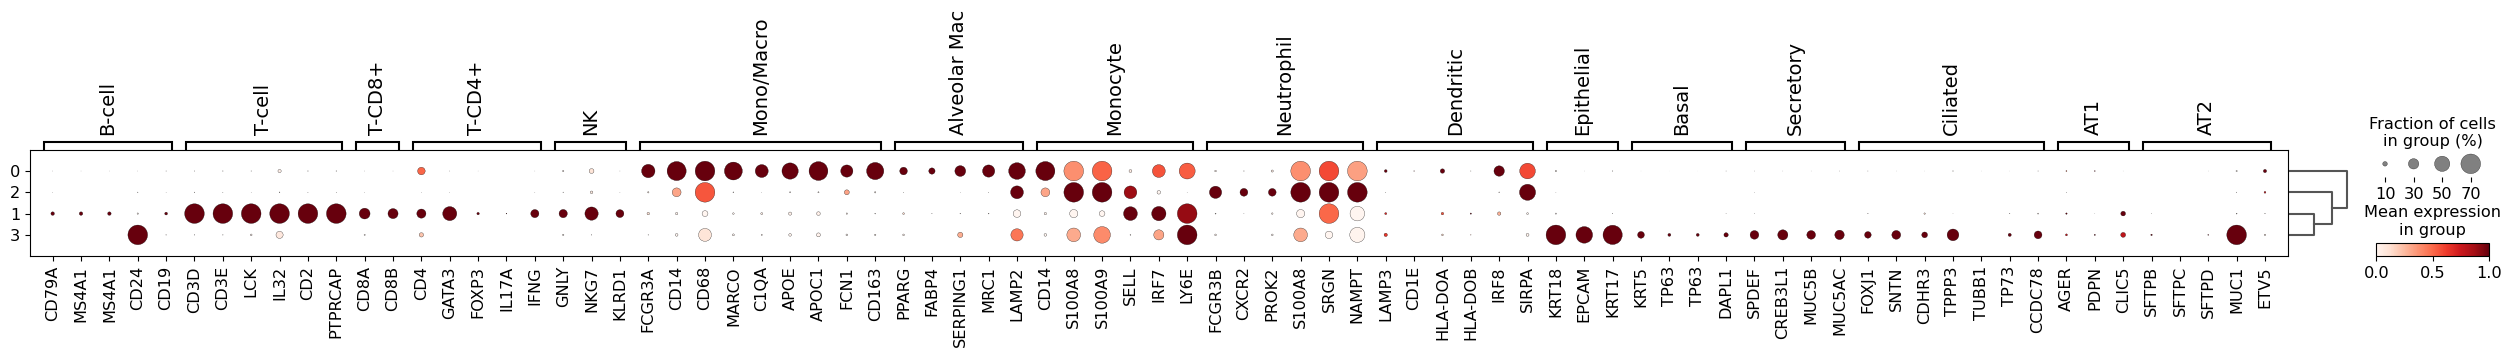

In [9]:
ax = sc.pl.dotplot(adata, marker_genes_dict, 
                   groupby='louvain',dot_max=0.7, standard_scale='var',dendrogram=True)

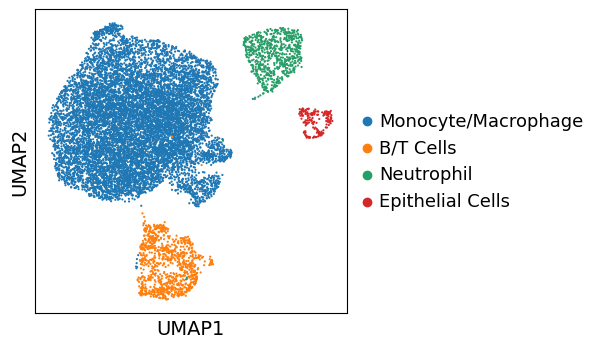

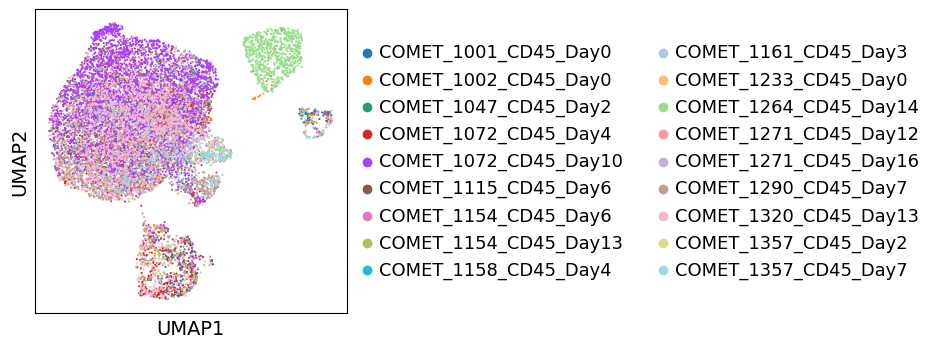

In [10]:
# mark the cell types

new_cluster_names = ['Monocyte/Macrophage','B/T Cells','Neutrophil', 'Epithelial Cells']
adata.rename_categories('louvain', new_cluster_names)

sc.pl.umap(adata, color='louvain', title='', frameon=True, save='.pdf')
sc.pl.umap(adata, color='Identity', title='', frameon=True, save='.pdf')

In [11]:
adata.write_h5ad('/mnt/ibm_lg/shoshana/trachasp/adataALL_samplesremoved_lowresclus.h5ad')

In [12]:
adataVAP = adata[adata.obs['VAP'].isin(['Yes'])]

In [13]:
adataVAP

View of AnnData object with n_obs × n_vars = 2815 × 33534
    obs: 'Identity', 'Patient', 'batch', 'VAP', 'Time', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'percent_mito', 'percent_ribo', 'percent_SARS', 'n_genes', 'n_counts', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'louvain', 'leiden'
    var: 'feature_types', 'gene_ids-0-0', 'gene_ids-1-0', 'gene_ids-2-0', 'gene_ids-3-0', 'gene_ids-4-0', 'gene_ids-5-0', 'gene_ids-6-0', 'gene_ids-7-0', 'gene_ids-8-0', 'gene_ids-9-0', 'gene_ids-1', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Identity_colors', 'Patient_colors', 'Time_colors', 'VAP_colors', '_scvi', '_training_mode', 'neighbors', 'umap', 'louvain', 'leiden', 'louvain_colors', 'leiden_c

In [14]:
adataVAP.write_h5ad('/mnt/ibm_lg/shoshana/trachasp/adataALL_VAP_samplesremoved_lowresclus.h5ad')

In [15]:
adataNOVAP = adata[adata.obs['VAP'].isin(['No'])]

In [16]:
adataNOVAP

View of AnnData object with n_obs × n_vars = 9382 × 33534
    obs: 'Identity', 'Patient', 'batch', 'VAP', 'Time', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'percent_mito', 'percent_ribo', 'percent_SARS', 'n_genes', 'n_counts', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'louvain', 'leiden'
    var: 'feature_types', 'gene_ids-0-0', 'gene_ids-1-0', 'gene_ids-2-0', 'gene_ids-3-0', 'gene_ids-4-0', 'gene_ids-5-0', 'gene_ids-6-0', 'gene_ids-7-0', 'gene_ids-8-0', 'gene_ids-9-0', 'gene_ids-1', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Identity_colors', 'Patient_colors', 'Time_colors', 'VAP_colors', '_scvi', '_training_mode', 'neighbors', 'umap', 'louvain', 'leiden', 'louvain_colors', 'leiden_c

In [17]:
adataNOVAP.write_h5ad('/mnt/ibm_lg/shoshana/trachasp/adataALL_NOVAP_samplesremoved_lowresclus.h5ad')

In [18]:
adataEarly = adata[adata.obs['Time'].isin(['Early'])]

In [19]:
adataEarly

View of AnnData object with n_obs × n_vars = 3730 × 33534
    obs: 'Identity', 'Patient', 'batch', 'VAP', 'Time', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'percent_mito', 'percent_ribo', 'percent_SARS', 'n_genes', 'n_counts', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'louvain', 'leiden'
    var: 'feature_types', 'gene_ids-0-0', 'gene_ids-1-0', 'gene_ids-2-0', 'gene_ids-3-0', 'gene_ids-4-0', 'gene_ids-5-0', 'gene_ids-6-0', 'gene_ids-7-0', 'gene_ids-8-0', 'gene_ids-9-0', 'gene_ids-1', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Identity_colors', 'Patient_colors', 'Time_colors', 'VAP_colors', '_scvi', '_training_mode', 'neighbors', 'umap', 'louvain', 'leiden', 'louvain_colors', 'leiden_c

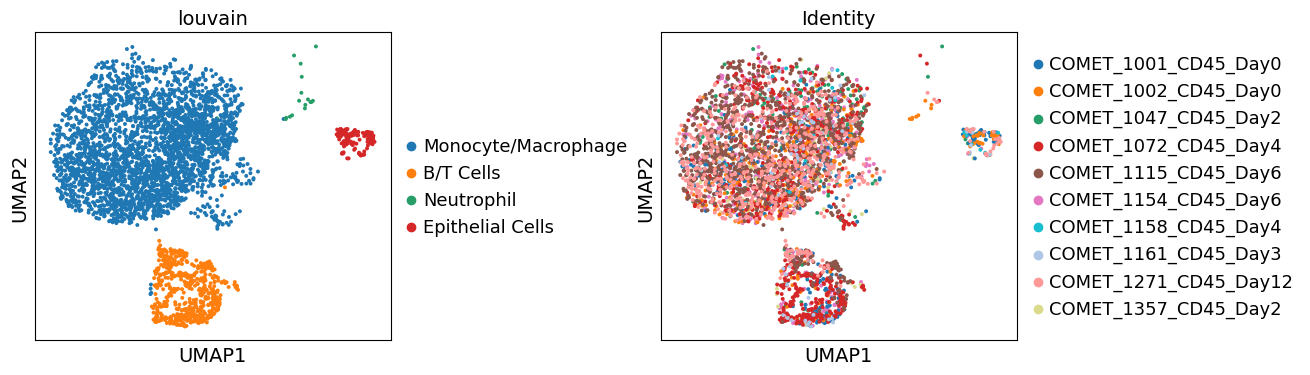

In [20]:
sc.pl.umap(adataEarly, color=['louvain', 'Identity'], ncols=3, wspace=0.6)

In [21]:
adataEarly.write_h5ad('/mnt/ibm_lg/shoshana/trachasp/adataEarly_samplesremoved_lowresclus.h5ad')

In [22]:
adataLate = adata[adata.obs['Time'].isin(['Late'])]

In [23]:
adataLate

View of AnnData object with n_obs × n_vars = 8467 × 33534
    obs: 'Identity', 'Patient', 'batch', 'VAP', 'Time', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'percent_mito', 'percent_ribo', 'percent_SARS', 'n_genes', 'n_counts', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'louvain', 'leiden'
    var: 'feature_types', 'gene_ids-0-0', 'gene_ids-1-0', 'gene_ids-2-0', 'gene_ids-3-0', 'gene_ids-4-0', 'gene_ids-5-0', 'gene_ids-6-0', 'gene_ids-7-0', 'gene_ids-8-0', 'gene_ids-9-0', 'gene_ids-1', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Identity_colors', 'Patient_colors', 'Time_colors', 'VAP_colors', '_scvi', '_training_mode', 'neighbors', 'umap', 'louvain', 'leiden', 'louvain_colors', 'leiden_c

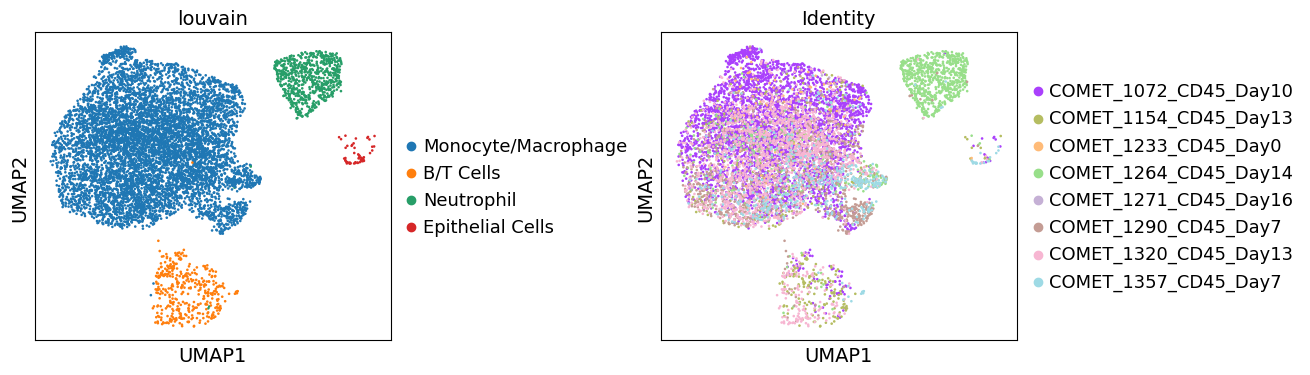

In [24]:
sc.pl.umap(adataLate, color=['louvain', 'Identity'], ncols=3, wspace=0.6)

In [25]:
adataLate.write_h5ad('/mnt/ibm_lg/shoshana/trachasp/adataLate_samplesremoved_lowersclus.h5ad')